# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Choose the right folder based on classes/regimes

In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/detectron2/detectron/dataset/1536x/iii")

In [ ]:
os.listdir(os.getcwd())

In [ ]:
import numpy as np
import os, json, cv2, random

# Create augmented train images (Run this only once)

In [ ]:
!pip install clodsa
!pip install numpy --upgrade

     |████████████████████████████████| 5.7 MB 6.3 MB/s 
     |████████████████████████████████| 276 kB 68.6 MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.47-py2.py3-none-any.whl size=74310 sha256=1e41d3dd574281bcf6316abb30bbc24162fb5a7c92b51f3b00d5fb0fe2a3ea22
  Stored in directory: /root/.cache/pip/wheels/05/ff/0a/0e6e14c2a68d6869a010e979b8fd9d669aaeaa2d8b29de394f
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=a55e1b865b1e321696e91969978b635314945ec5bb8e2be2b3bf83d272c6a5b6
  Stored in directory: /root/.cache/pip/wheels/eb/bb/07/25a7f0718ee3fe137384011b8e56070f91cf950ee6047c287f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62527 sha256=08b9316b2e93efd1ed6246423ca403e26ecae32966d85c512fc27f97a5a0379a
  Stored in directory: /root/.cache/pip/wheels/92/e3/af/1dc0fdca93232d700ac176af6554cf22b85f3d7e8aeee5ac08
Successfully built clodsa commentjson lark-parser
     |█████████████████████████████

The annotations json file needs to be in the INPUT_PATH. Also make sure the annotations file has the "info" and "license" information. Create folder "im_train_aug"

In [ ]:
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique

# The kind of problem. In this case, we are working in an instance segmentation problem.
PROBLEM = "instance_segmentation"
# The annotation mode. The annotation is provided using the coco format in a file called annotations.json.
ANNOTATION_MODE = "coco"
# The input path. The input path containing the images.
INPUT_PATH = "im_train"
# The generation mode. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset.
GENERATION_MODE = "linear"
# The output mode. The generated images will be stored in a new folder called output.
OUTPUT_MODE = "coco"
OUTPUT_PATH= "im_train_aug/"

augmentor = createAugmentor(PROBLEM, ANNOTATION_MODE, OUTPUT_MODE, GENERATION_MODE, INPUT_PATH, { "outputPath": OUTPUT_PATH })

# Adding the augmentation techniques
transformer = transformerGenerator(PROBLEM)
# Rotations:
for angle in [90,180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))
# Flips:
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))

# Applying the augmentation process
augmentor.applyAugmentation()


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


# Merge datasets for training


In [ ]:
!pip install coco-assistant

     |████████████████████████████████| 11.3 MB 5.0 MB/s 
     |████████████████████████████████| 327 kB 77.3 MB/s 
     |████████████████████████████████| 11.2 MB 55.5 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 890 kB 78.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, b

In [ ]:
from coco_assistant import COCO_Assistant

# Specify image and annotation directories
img_dir = os.path.join(os.getcwd(), 'im_to_merge')
ann_dir = os.path.join(os.getcwd(), 'label_to_merge')

# Create COCO_Assistant object
cas = COCO_Assistant(img_dir, ann_dir)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [ ]:
cas.merge()

Merging annotations


100%|██████████| 2/2 [00:00<00:00, 135.34it/s]


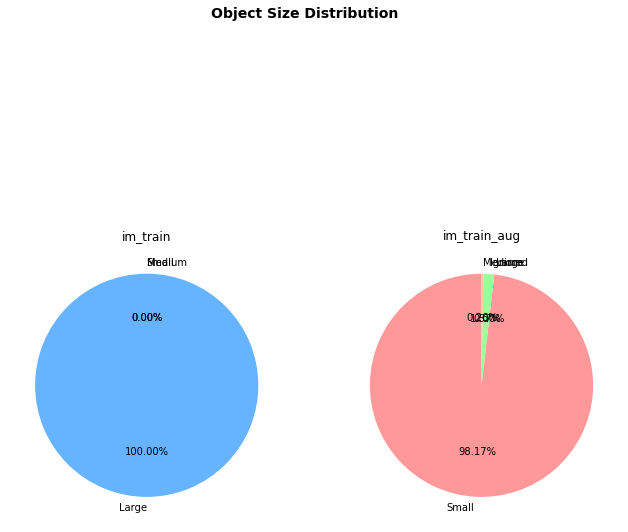

In [ ]:
cas.ann_stats(stat="area",arearng=[10,144,512,1e5],save=False)

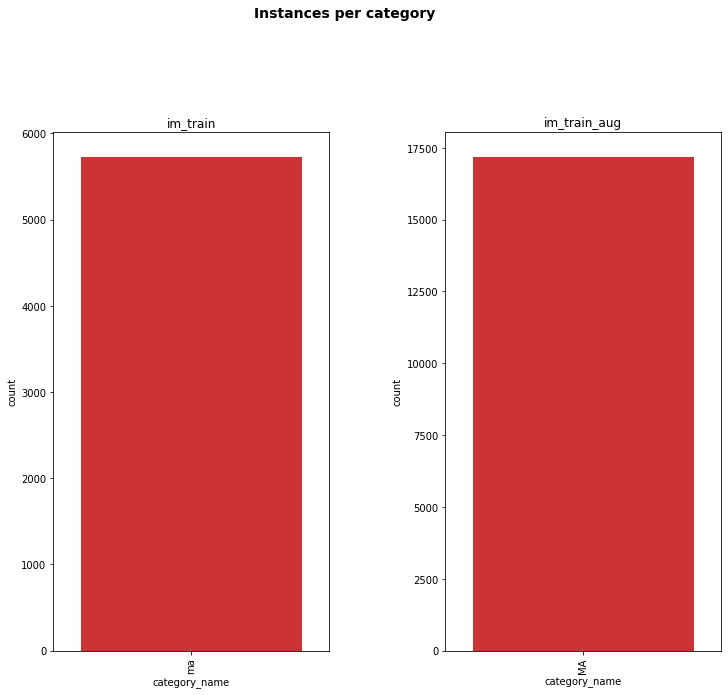

In [ ]:
cas.ann_stats(stat="cat", arearng=None, show_count=False, save=False)

In [ ]:
cas.visualise()
